In [3]:
from src.baseline import Baseline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os; os.chdir('..')


# Results

In [20]:

def test_baseline(time, n_days = 21, T = 200):
    model = Baseline()

    y = []
    yp = []
    for i in tqdm(range(T)):
        time2 = pd.to_datetime(time) + pd.Timedelta('1 days')
        data = model.fetch_data(str(time2), n_days = 1)
        mean, _, _ = model.get_forecast(time, n_days)

        time = str(pd.to_datetime(time) + pd.Timedelta('1 days'))

        y.append(data)
        yp.append(mean)

    return y, yp

y, yp = test_baseline('2019-01-01')


  9%|▉         | 18/200 [00:51<13:03,  4.30s/it]/opt/miniconda3/envs/em/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 12%|█▏        | 23/200 [01:10<10:59,  3.73s/it]/opt/miniconda3/envs/em/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/em/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/miniconda3/envs/em/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

NameError: name 'data' is not defined

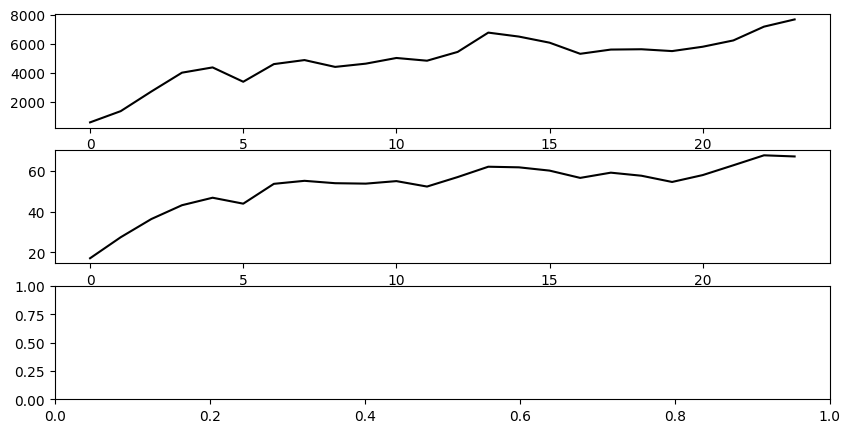

In [18]:
y, yp = np.array(y), np.array(yp)
E = np.array(yp-y)
fig, ax = plt.subplots(3, 1, figsize = (10, 5))
ax[0].plot(np.nanmean(E**2, axis = 0), color = 'black')

ax[1].plot(np.nanmean(abs(E), axis = 0), color = 'black')

# mape
ax[2].plot(np.nanmean(abs(E)/y, axis = 0), color = 'black')
